# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# colab to access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
# Write your code here to view the first 5 rows
# To view the first 5 rows from the dataset
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:There are 1898 rows and 9 columns in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# checking the data types of the different columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 0 to 1897 entries in the data set. There are 3 different data types:
1. Int64
2. float64
3. object


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking missing values accross each columns in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in the dataset and do not required to treat any data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Displaying statistical summary for both the numerical and categorical variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations: The statistical data for each varaible/column has been captured


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Displaying the number of orders that are not rated
df[df['rating'] == 'Not given'].shape[0]

736

#### Observations: There are 736 orders that are not rated for the restaurants


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

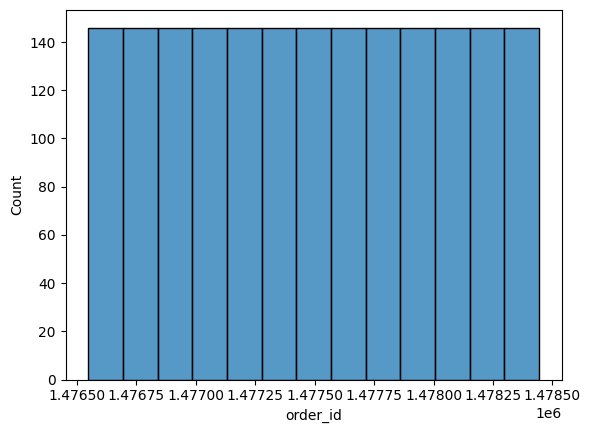

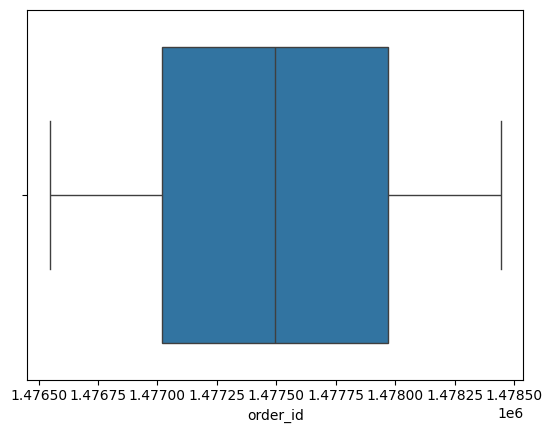

In [ ]:

# 1. Observations on order_id
df['order_id'].nunique()
sns.histplot(x=df['order_id'])
plt.show()
sns.boxplot(x=df['order_id'])
plt.show()

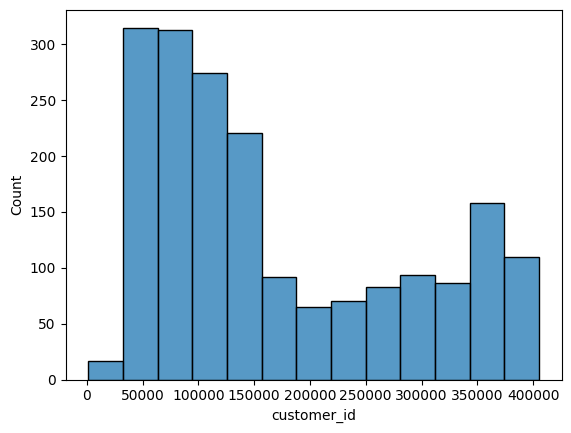

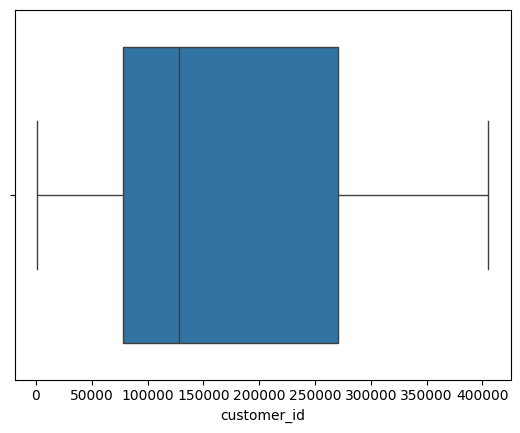

In [ ]:
# 2. Observations on customer_id
df['customer_id'].nunique()
sns.histplot(x=df['customer_id'])
plt.show()
sns.boxplot(x=df['customer_id'])
plt.show()

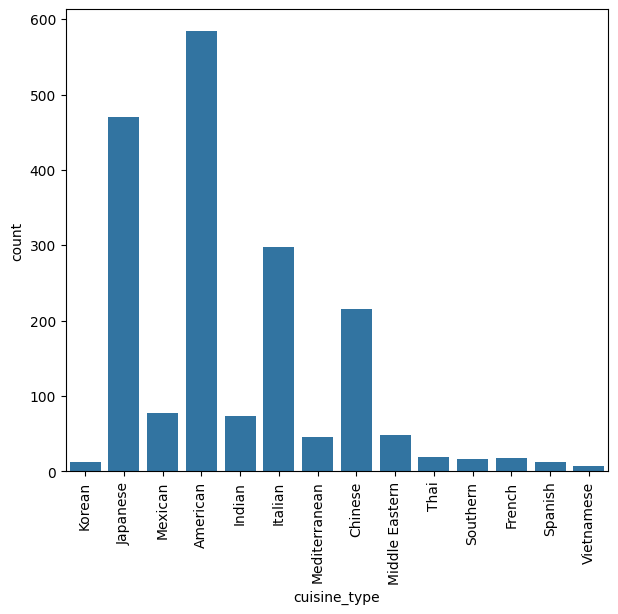

In [ ]:
# 3. Observations on cuisine_type
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

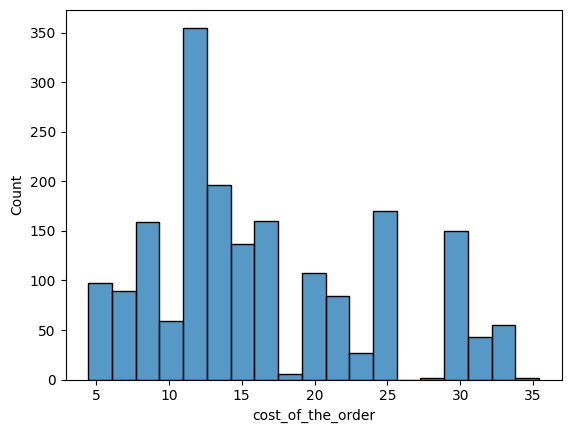

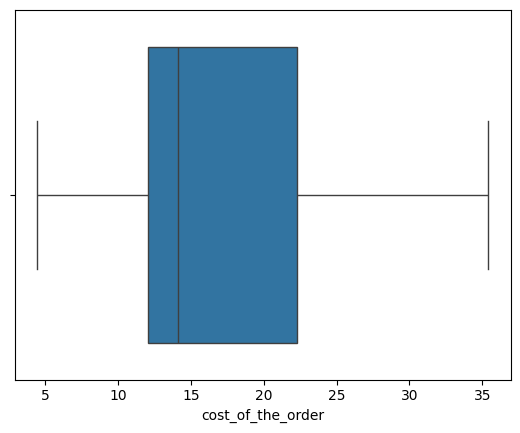

In [ ]:
# 4. Observations on cost_of_the_order
sns.histplot(x=df['cost_of_the_order'])
plt.show()
sns.boxplot(x=df['cost_of_the_order'])
plt.show()

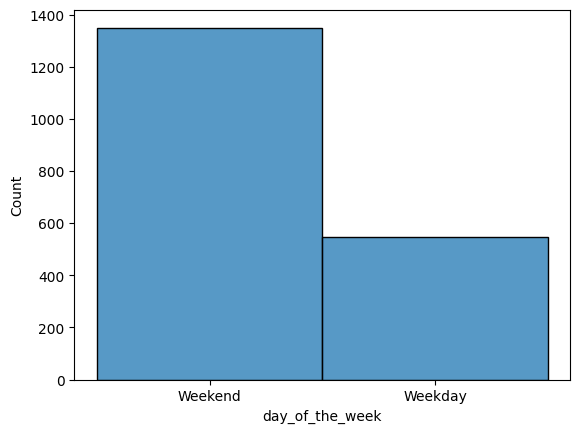

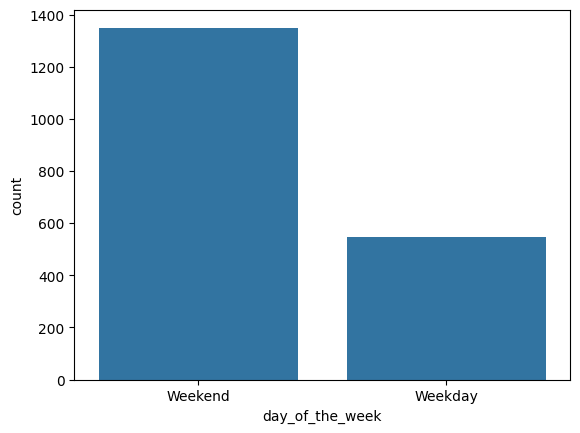

In [ ]:
# 5. Observations on day_of_the_week
sns.histplot(x=df['day_of_the_week'])
plt.show()
sns.countplot(x=df['day_of_the_week'])
plt.show()

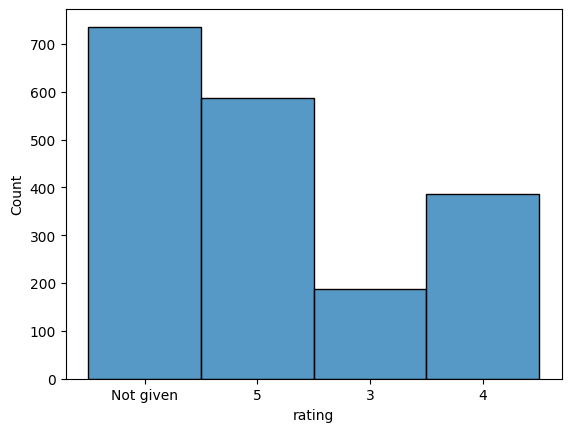

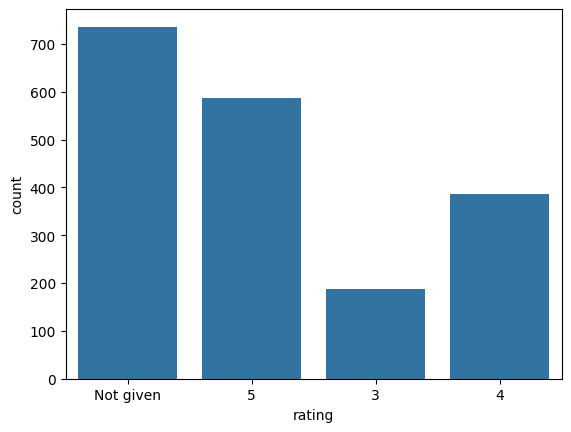

In [ ]:
# 6. Observations on rating
sns.histplot(x=df['rating'])
plt.show()
sns.countplot(x=df['rating'])
plt.show()

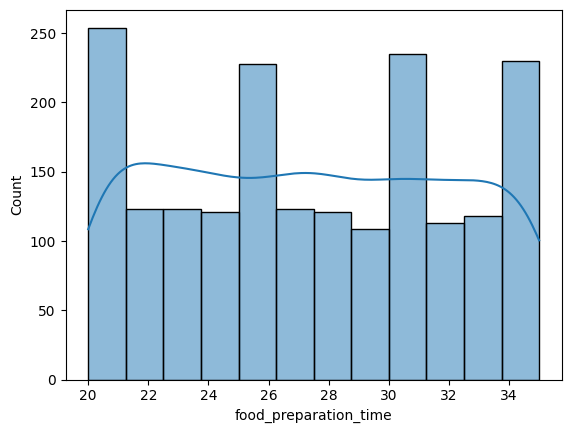

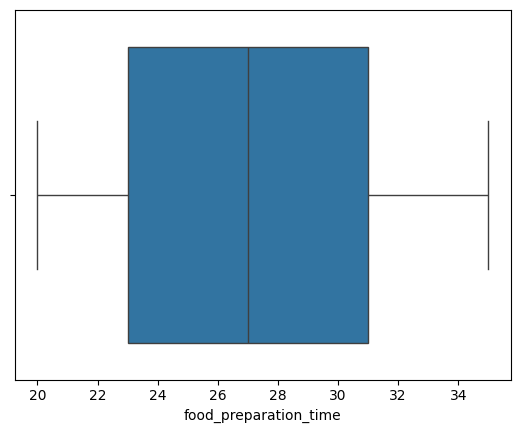

In [ ]:
# 7. Observations on food_preparation_time
sns.histplot(x=df['food_preparation_time'], kde=True)
plt.show()
sns.boxplot(x=df['food_preparation_time'])
plt.show()

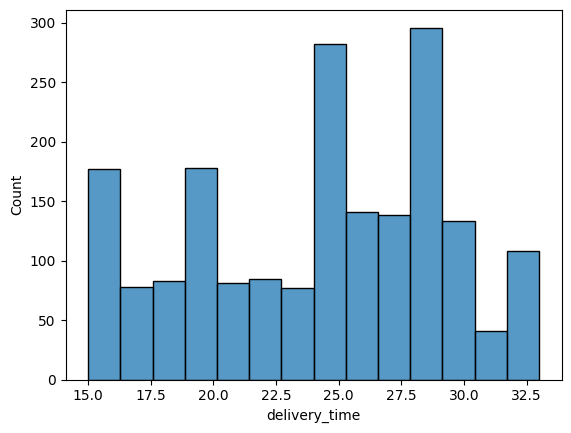

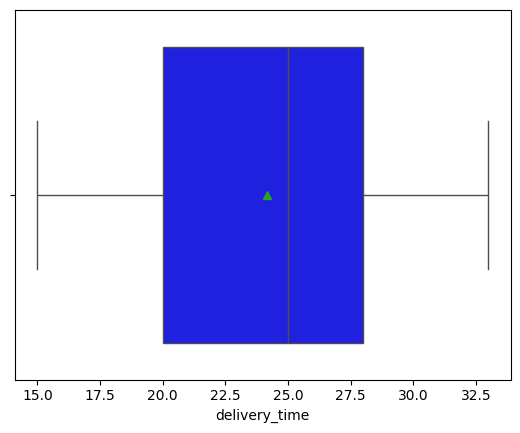

In [ ]:
# 8. Observations on delivery_time
sns.histplot(x=df['delivery_time'])
plt.show()
sns.boxplot(x=df['delivery_time'], showmeans=True, color='blue')
plt.show()

In [ ]:
# 9. observation on restaurant name
df['restaurant_name'].nunique()

178

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Displaying Top 5 restaurants based on order received
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: Top 5 restaurant names for orders received are shake shack with 219, The Meatball Shop with 132, Blue Ribbon Sushi with 119, Blue Ribbon Fried Chicken with 96, Parm with 68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# To display most popular cuisine on weekend
most_popular_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekend is:", most_popular_cuisine)

The most popular cuisine on weekend is: American


#### Observations: American cuisine is the most popular cuisine on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# To display percentage of orders cost more than 20 dollars
percentage_of_the_order = df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100
rounded_percentage = round(percentage_of_the_order, 2)
print("The percentage is:", rounded_percentage, "%")

The percentage is: 29.24 %


#### Observations: 29.24% of customers are ordering food for more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# To display the mean of order delivery time
order_delivery_time = df['delivery_time'].mean()
rounded_delivery_time = round(order_delivery_time, 2)
print("The mean order delivery time is:", rounded_delivery_time)

The mean order delivery time is: 24.16


#### Observations: The average delivery time of the order is 24.16 minutes which will allow customers to know how long it would take to recieve the food


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# To display top 3 frequent customers based on the orders they placed
top_3_customers = df['customer_id'].value_counts().head(3)
print("The top 3 customers are:",'\n',top_3_customers)

The top 3 customers are: 
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: Below are the top 3 customers found from the dataset are with more number of orders placed.
1. Customer id  52832  had placed 13 orders
2. Customer id  47440  had placed 10 orders
3. Customer id  83287  had placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


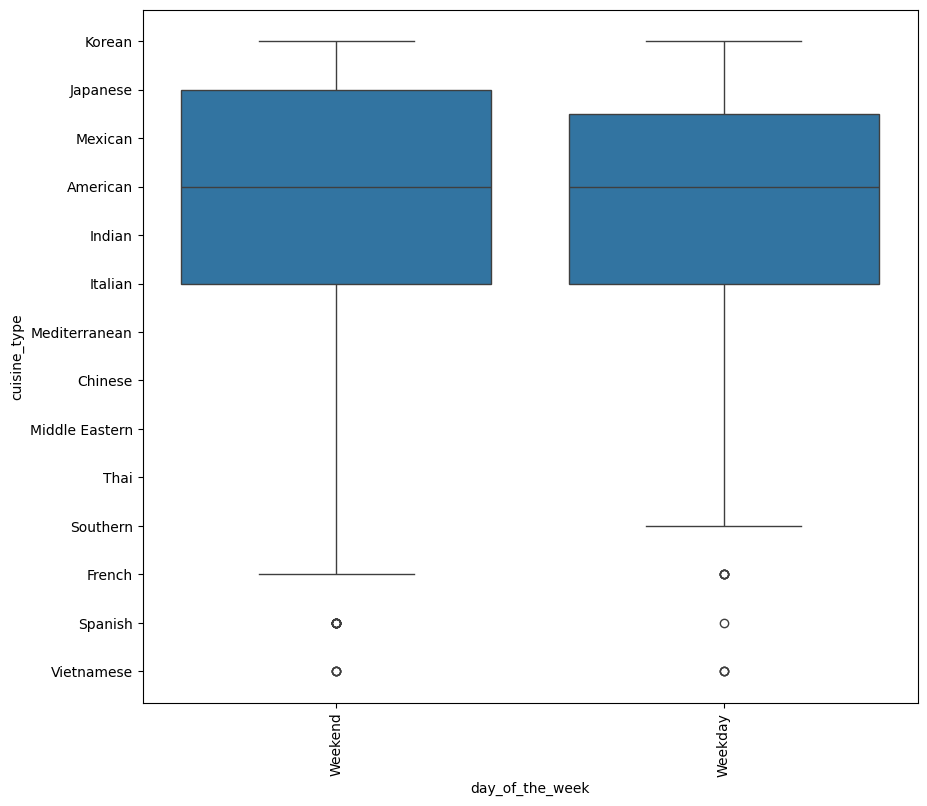

In [ ]:
# Relationship between 'day_of_the_week' and 'cuisine_type'
plt.figure(figsize=(10, 9))
sns.boxplot(data=df, x='day_of_the_week', y='cuisine_type')
plt.xticks(rotation=90)
plt.show()


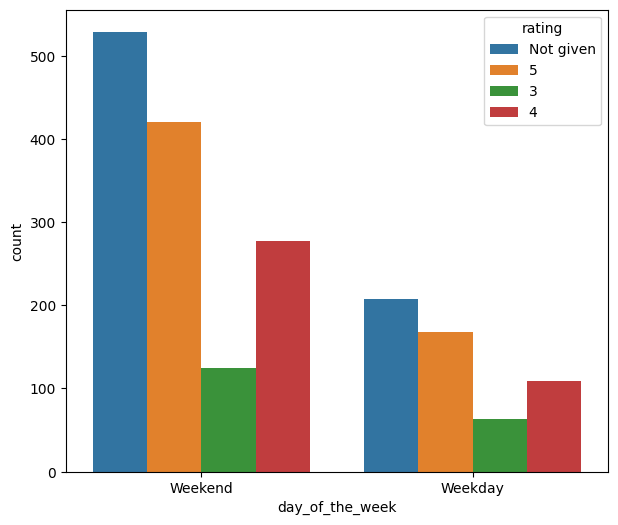

In [ ]:
# Relationship between 'day_of_the_week' and 'rating'
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='day_of_the_week', hue='rating')
plt.show()

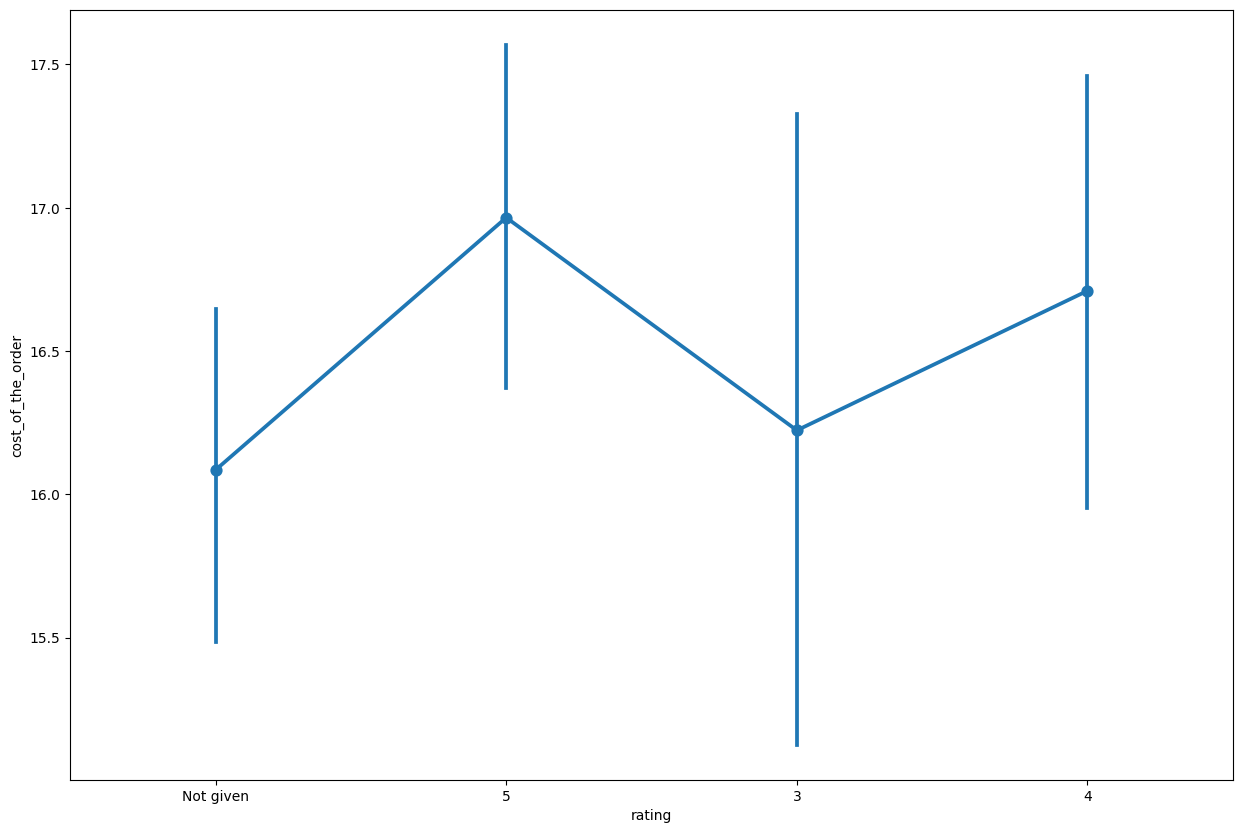

In [ ]:
# Relationship between 'rating' and 'cost_of_the_order'
plt.figure(figsize=(15, 10))
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.show()

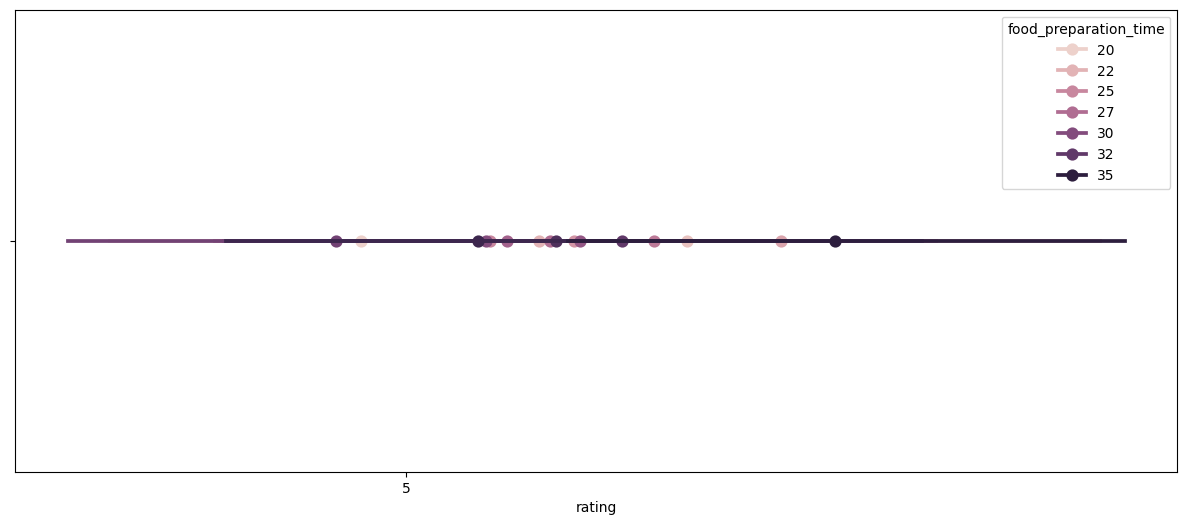

In [ ]:
# Relationship between 'rating' and 'food_preparation_time'
plt.figure(figsize=(15, 6))
sns.pointplot(data=df, x='rating', hue='food_preparation_time')
plt.show()

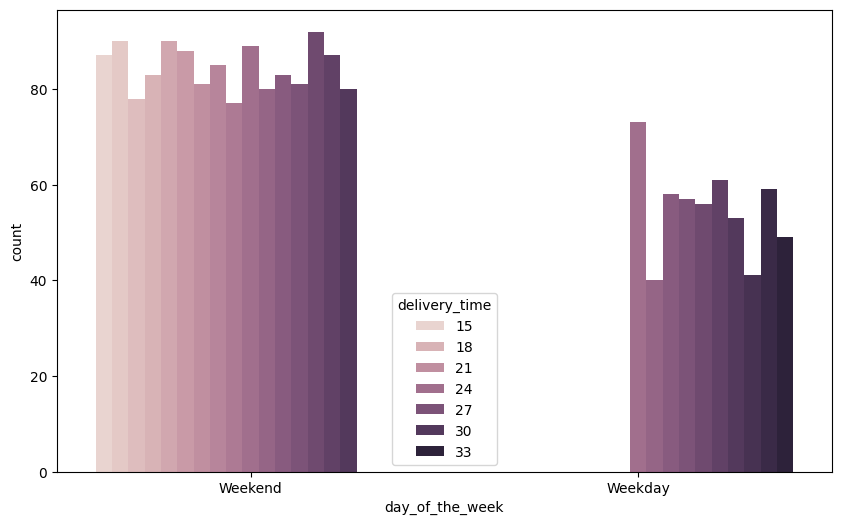

In [ ]:
# Relationship between 'day_of_the_week' and 'delivery_time'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_the_week', hue='delivery_time')
plt.show()

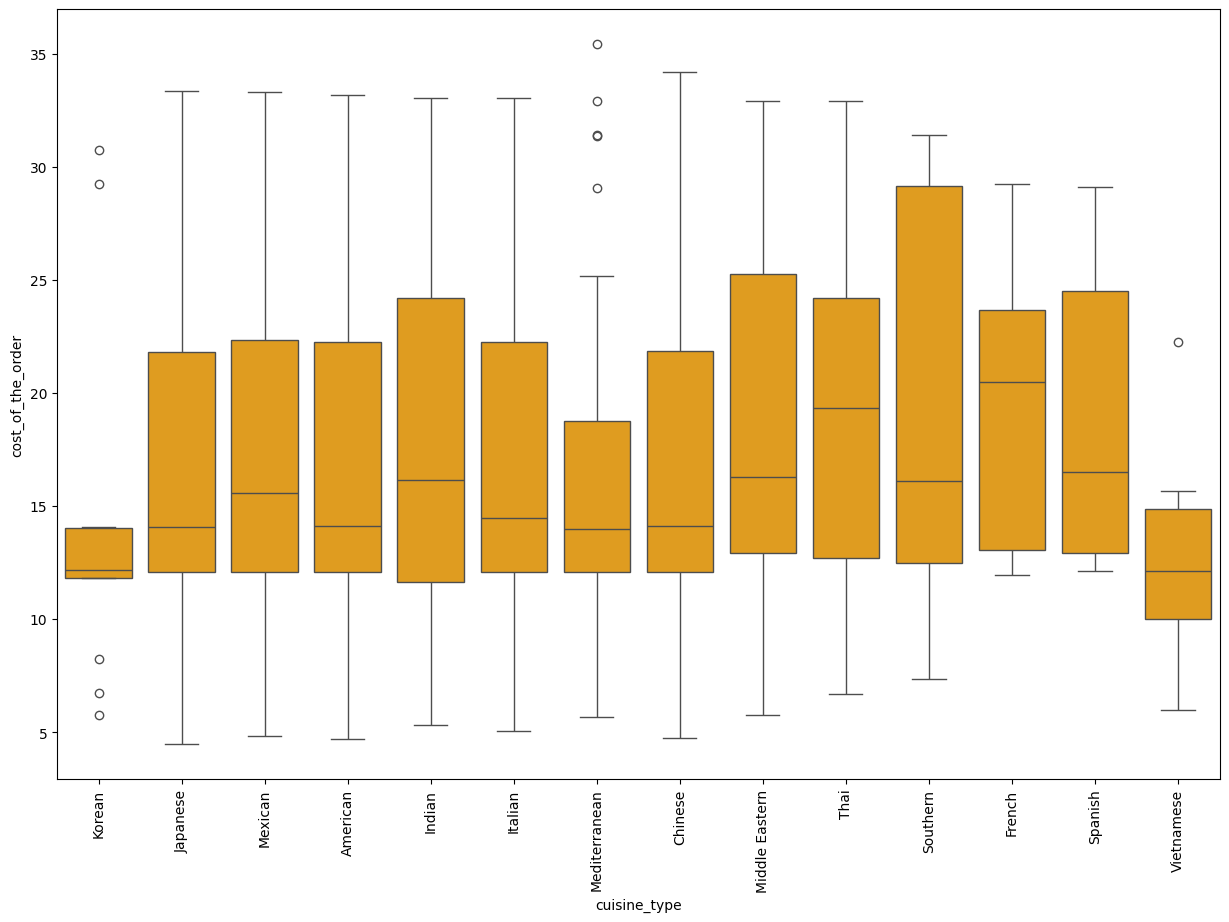

In [ ]:
# Relationship between 'cuisine_type' and 'cost_of_the_order'
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', color = 'orange')
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the restaurant column that do no have rating as 'Not given'
filtered_df = df[df['rating'] != 'Not given'].copy()

# Covert the rating column from object to interger datatype
filtered_df['rating'] = filtered_df['rating'].astype(int)

# Create a dataframe that contains the restaurantname with rating counts
filtered_df_rating = filtered_df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# Display retaurants names that have rating more than 50
restaurant_names_50rating = filtered_df_rating[filtered_df_rating['rating'] > 50 ]['restaurant_name']
rest_rating_mean = filtered_df_rating[filtered_df_rating['restaurant_name'].isin(restaurant_names_50rating)].copy()
rest_rating_mean.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()





,restaurant_name,rating
0,Shake Shack,133.0
1,The Meatball Shop,84.0
2,Blue Ribbon Sushi,73.0
3,Blue Ribbon Fried Chicken,64.0


#### Observations: These are restaurants eligible for promotional offer:
Shake Shack, The Meatball shop, Blue Ribbon Sushi, Blue Ribbon fried chicken are having more than 50 ratings and avregae ratings geater than 4


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to generate the revenue generated by the company across all orders
def revenue_generator(x):
  if x > 20:
    return x * 0.25
  elif x > 5:
    return x * 0.15
  else:
    return x * 0

total_revenue = round(df['cost_of_the_order'].apply(revenue_generator).sum(), 2)
print("The net revenue generated by the company across all orders is:", total_revenue)

The net revenue generated by the company across all orders is: 6166.3


#### Observations: The total net value generated is 6166.3. We still need more research on the overall revenue to see how much revenue each company has produced


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# To display total time of food preparation and delivery
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# To count the orders take more than 60 minutes and print the percentage
count_percentage = df[df['total_time'] > 60].shape[0] / df.shape[0] * 100
print("The percentage of orders take more than 60 minutes to get delivered is:", round(count_percentage, 2), "%")


The percentage of orders take more than 60 minutes to get delivered is: 10.54 %


#### Observations: 10.54% of orders taking more than 60 minutes. Looks like some of the customers are waiting for more than 60 minutes to recieve the orders.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# To display the mean delivery time variation during weekdays & weekend
delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: After analyzing, weekend delivery time is much quicker than weekdays


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. The orders based on cuisine is higher over the weekends comparing to weekdays.
2. Delivery time is really quick during the weekend
3. Higher rating restauratns are more popular and recieving more orders
4. Most of the customers not provided the ratings because they are not frequent purchasers.

### Recommendations:
1. The revenue generated is calculated overall, recommendation to review the revenue for each company.
2. Some restaurants has more than 60 minutes of delivery time while other restaurants are delivering within 30 minutes. Recommending to reduce the delivery time.
3. Provide more offers on delivery fee to customers to increase the orders

---